In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from tqdm.notebook import tqdm

In [2]:
def Q(x):
    return 1 - scipy.stats.norm.cdf(x)

def natAdvErrs(snr, sar, num_samples):
    xs = np.linspace(start=-snr, stop=snr, num=num_samples)
    return np.stack((
        Q(xs),
        Q(xs - sar)
    ), axis=-1)

natAdvErrs(snr=1, sar=1, num_samples=5)

array([[0.84134475, 0.97724987],
       [0.69146246, 0.9331928 ],
       [0.5       , 0.84134475],
       [0.30853754, 0.69146246],
       [0.15865525, 0.5       ]])

# Plots

In [3]:
def plot_pts(snr_sar_pairs, num_samples, **plt_kwargs):
    for snr, sar in snr_sar_pairs:
        pts = natAdvErrs(snr=snr, sar=sar, num_samples=num_samples)

        plt.plot(
            pts[:, 0], pts[:, 1],
            label=f"snr={snr}; sar={sar}",
            **plt_kwargs
        )

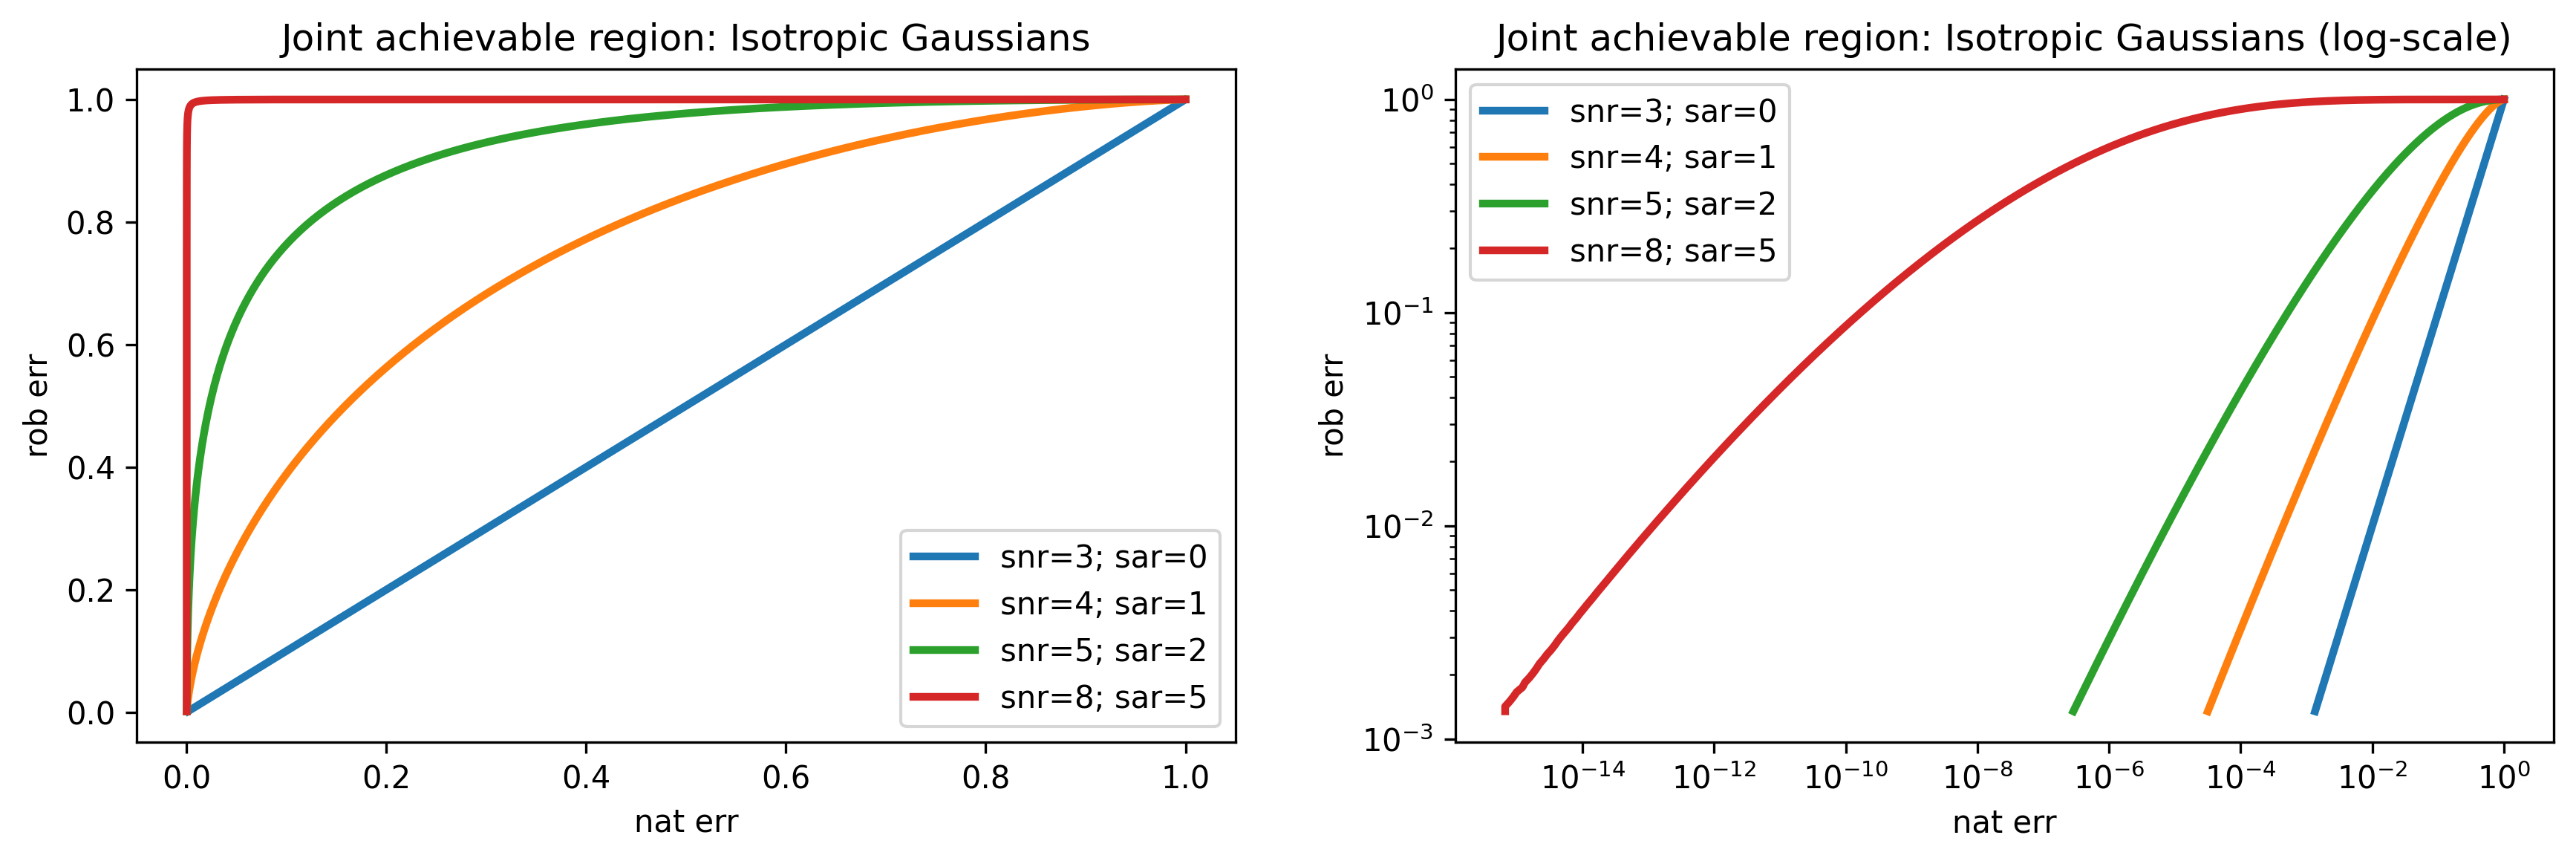

In [4]:
def plt_main():
    plot_pts(
        [(3, 0), (4, 1,), (5, 2), (8, 5)],
        num_samples=1000,
        lw=2.5
    )
    plt.xlabel("nat err");
    plt.ylabel("rob err");
    
plt.figure(figsize=(14, 4), dpi=300);
    
plt.subplot(1, 2, 1);
plt_main()
plt.legend(bbox_to_anchor=(1, 0), loc='lower right', ncol=1);
plt.title("Joint achievable region: Isotropic Gaussians");


plt.subplot(1, 2, 2);
plt_main()
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1);
plt.title("Joint achievable region: Isotropic Gaussians (log-scale)");
plt.xscale("log"); plt.yscale("log");

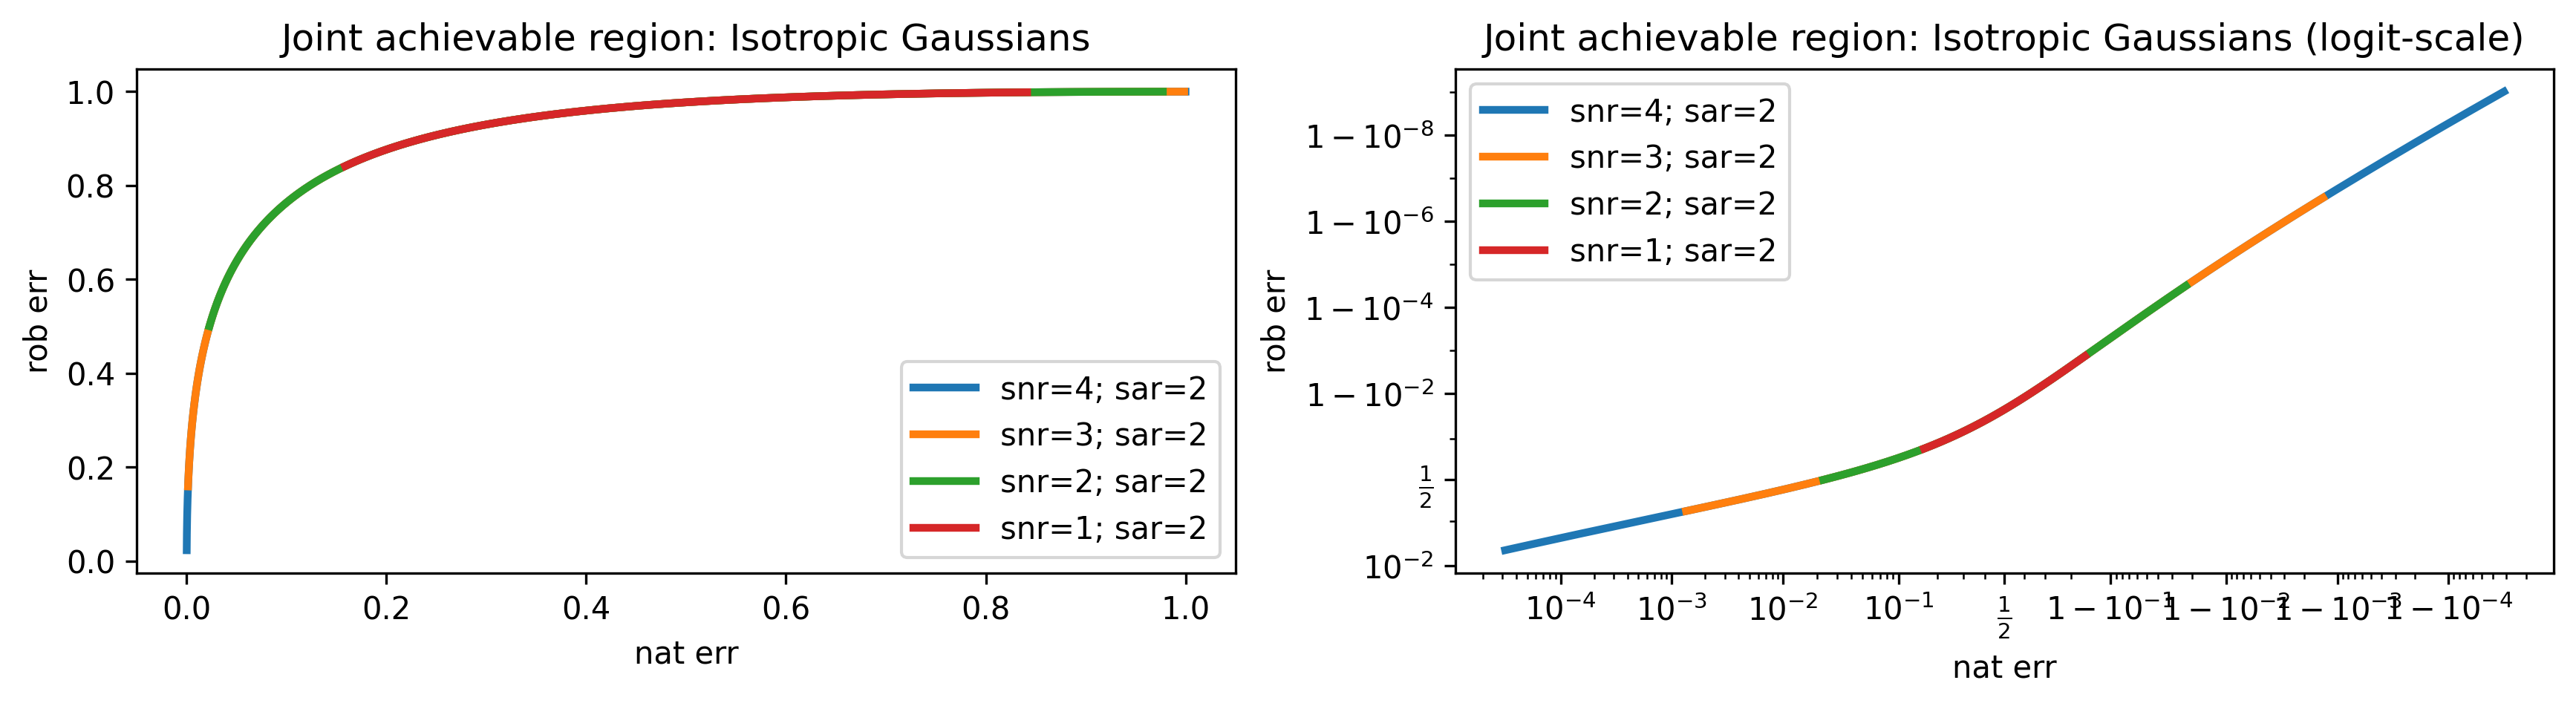

In [5]:
def plt_main():
    plot_pts(
        [(4, 2), (3, 2), (2, 2), (1, 2)],
        num_samples=1000,
        lw=2.5
    )
    plt.xlabel("nat err");
    plt.ylabel("rob err");
    
plt.figure(figsize=(14, 3), dpi=300);
    
plt.subplot(1, 2, 1);
plt_main()
plt.legend(bbox_to_anchor=(1, 0), loc='lower right', ncol=1);
plt.title("Joint achievable region: Isotropic Gaussians");


plt.subplot(1, 2, 2);
plt_main()
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1);
plt.title("Joint achievable region: Isotropic Gaussians (logit-scale)");
plt.xscale("logit"); plt.yscale("logit");